<a href="https://colab.research.google.com/github/dk-wei/dl-recomm-algo-implementation/blob/main/Wide_n_deep_classification%E6%A8%A1%E5%9E%8B%E7%AE%80%E5%8D%95%E5%AE%9E%E7%8E%B0(multi_input_output).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

代码来源：https://github.com/dongxiaohuang/Tensorflow2.0_notes/blob/main/tf_keras_regression_wide_deep_multi_input.ipynb

讲解博客：https://zhuanlan.zhihu.com/p/348968507

In [1]:
!pip config set global.index-url https://mirrors.aliyun.com/pypi/simple/
!python -m pip install -U pip
!pip -V
#!pip install sklearn pandas

Writing to /root/.config/pip/pip.conf
Looking in indexes: https://mirrors.aliyun.com/pypi/simple/
pip 21.1.3 from /usr/local/lib/python3.7/dist-packages/pip (python 3.7)


In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

import tensorflow as tf

In [3]:
print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, tf.keras:
    print(module.__name__, module.__version__)


2.5.0
sys.version_info(major=3, minor=7, micro=10, releaselevel='final', serial=0)
matplotlib 3.2.2
numpy 1.19.5
pandas 1.1.5
sklearn 0.22.2.post1
tensorflow 2.5.0
tensorflow.keras 2.5.0


# Breast cancer data ETL




In [4]:
from sklearn.datasets import load_breast_cancer

demo_data = load_breast_cancer()
print(demo_data.DESCR)
print(demo_data.data.shape)
print(demo_data.target.shape)
demo_data.data[0]


.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [5]:
from sklearn.model_selection import train_test_split

x_train_all, x_test, y_train_all, y_test = train_test_split(
    demo_data.data, demo_data.target, random_state = 7)
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_all, y_train_all, random_state = 11)
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

(319, 30) (319,)
(107, 30) (107,)
(143, 30) (143,)


In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

# Model Creation (multiple inputs)

Model Structure

![](https://camo.githubusercontent.com/b8b9d8c6c4277fb35ff70d48fbfce457a5b3d32d/68747470733a2f2f312e62702e626c6f6773706f742e636f6d2f2d4477316d4239616d316c382f56334d67744f7a703375492f41414141414141414247732f6d502d336e5a51436a5777646b367143613557726153704b3841377253506a3341434c63422f73313630302f696d61676530342e706e67)

## Function API Implementation

In [7]:
# 多输入, 多输出
tf.random.set_seed(2)

input_wide = tf.keras.layers.Input(shape=[15], name='input_wide')
input_deep = tf.keras.layers.Input(shape=[15], name='input_deep')

hidden1 = tf.keras.layers.Dense(30, activation='relu')(input_deep)
hidden2 = tf.keras.layers.Dense(30, activation='relu')(hidden1)

concat = tf.keras.layers.concatenate([input_wide, hidden2])

output1 = tf.keras.layers.Dense(1, activation='sigmoid', name='output_1')(concat)
output2 = tf.keras.layers.Dense(1, activation='sigmoid', name='output_2')(concat)

model = tf.keras.models.Model(inputs = [input_wide, input_deep],
                         outputs = [output1, output2])


In [8]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_deep (InputLayer)         [(None, 15)]         0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           480         input_deep[0][0]                 
__________________________________________________________________________________________________
input_wide (InputLayer)         [(None, 15)]         0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
______________________________________________________________________________________________

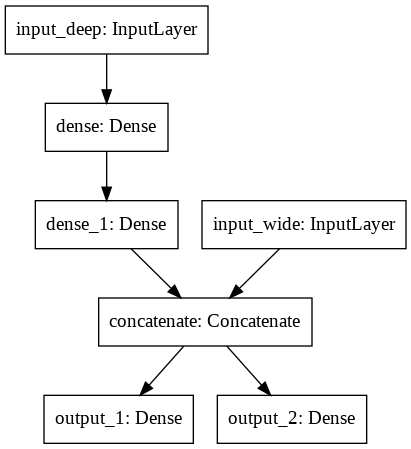

In [9]:
# plot model

# tf.keras.utils.plot_model(
#     model,
#     to_file="model.png",
#     show_shapes=False,
#     show_dtype=False,
#     show_layer_names=True,
#     rankdir="TB",
#     expand_nested=False,
#     dpi=96,
# )


tf.keras.utils.plot_model(model, show_layer_names=True)


In [10]:
# test 
inputs = [np.array([list(range(15))]), np.array([list(range(15))])]

model(inputs)

[<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[2.8273863e-07]], dtype=float32)>,
 <tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.01569781]], dtype=float32)>]

## Model Subclassing Implementation

In [11]:
tf.random.set_seed(2)
class WideDeepModel(tf.keras.models.Model):
  def __init__(self, **kwargs):
    super().__init__(**kwargs)
    self.hidden1 = tf.keras.layers.Dense(30, activation='relu')
    self.hidden2 = tf.keras.layers.Dense(30, activation='relu')
    self.concat = tf.keras.layers.concatenate
    self.dense1 = tf.keras.layers.Dense(1, activation='sigmoid', name='output_1')
    self.dense2 = tf.keras.layers.Dense(1, activation='sigmoid', name='output_2')
  
  def call(self, inputs):
    input_wide, input_deep = inputs
    output_deep = self.hidden1(input_deep)
    output_deep = self.hidden2(output_deep)
    concat_input = self.concat([input_wide, output_deep])
    output1 = self.dense1(concat_input)
    output2 = self.dense2(concat_input)
    return [output1, output2]
  
  def build_graph(self, shapes):
    x_wide_shape, x_deep_shape = shapes
    input_wide = tf.keras.layers.Input(shape=[15], name='input_wide')
    input_deep = tf.keras.layers.Input(shape=[15], name='input_deep')
    inputs = [input_wide, input_deep]
    return tf.keras.models.Model(inputs=inputs, outputs=self.call(inputs))

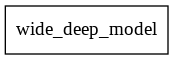

In [12]:
model = WideDeepModel()
tf.keras.utils.plot_model(model)

In [13]:
model.build_graph([(15,), (15,)]).summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_deep (InputLayer)         [(None, 15)]         0                                            
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 30)           480         input_deep[0][0]                 
__________________________________________________________________________________________________
input_wide (InputLayer)         [(None, 15)]         0                                            
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 30)           930         dense_2[0][0]                    
____________________________________________________________________________________________

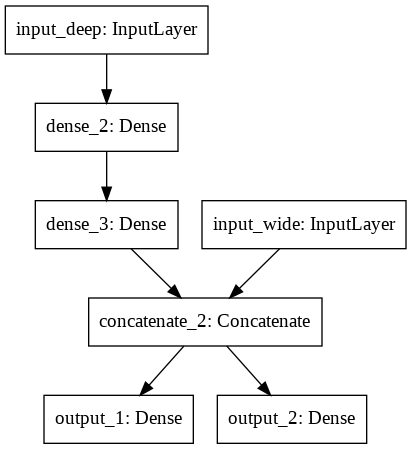

In [14]:
tf.keras.utils.plot_model(model.build_graph([(15,), (15,)]))

In [15]:
# test 
inputs = [np.array([list(range(15))]).astype('float32'), np.array([list(range(15))]).astype('float32')]

model(inputs)

[<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[2.8273863e-07]], dtype=float32)>,
 <tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.01569781]], dtype=float32)>]

## Train and test

In [16]:
# same loss function
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5, min_delta=1e-2)
]

In [17]:
# different loss function
## specific loss and loss weights
losses = {
	"output_1": "binary_crossentropy",
	"output_2": "binary_crossentropy",
}

loss_weights = {"output_1": 1.0, "output_2": 2}  # 两个模型的loss weight也是可以不同的

model.compile(loss=losses, loss_weights=loss_weights, metrics=['accuracy'])

In [18]:
# wide和deep 方向选取不同features

x_train_scaled_wide = x_train_scaled[:, :15]
x_train_scaled_deep = x_train_scaled[:, 15:]
x_valid_scaled_wide = x_valid_scaled[:, :15]
x_valid_scaled_deep = x_valid_scaled[:, 15:]
x_test_scaled_wide = x_test_scaled[:, :15]
x_test_scaled_deep = x_test_scaled[:, 15:]


history = model.fit([x_train_scaled_wide, x_train_scaled_deep], y_train,
                   validation_data=([x_valid_scaled_wide, x_valid_scaled_deep], y_valid),
                   epochs=100,
                   callbacks=callbacks)

Epoch 1/100
10/10 [==============================] - 1s 33ms/step - loss: 1.3374 - output_1_loss: 0.4613 - output_2_loss: 0.4381 - output_1_accuracy: 0.8182 - output_2_accuracy: 0.8558 - val_loss: 1.3160 - val_output_1_loss: 0.4553 - val_output_2_loss: 0.4303 - val_output_1_accuracy: 0.8224 - val_output_2_accuracy: 0.8505
Epoch 2/100
10/10 [==============================] - 0s 4ms/step - loss: 1.1125 - output_1_loss: 0.3874 - output_2_loss: 0.3626 - output_1_accuracy: 0.9028 - output_2_accuracy: 0.9028 - val_loss: 1.1389 - val_output_1_loss: 0.3967 - val_output_2_loss: 0.3711 - val_output_1_accuracy: 0.8692 - val_output_2_accuracy: 0.8598
Epoch 3/100
10/10 [==============================] - 0s 6ms/step - loss: 0.9515 - output_1_loss: 0.3351 - output_2_loss: 0.3082 - output_1_accuracy: 0.9216 - output_2_accuracy: 0.9154 - val_loss: 0.9916 - val_output_1_loss: 0.3456 - val_output_2_loss: 0.3230 - val_output_1_accuracy: 0.8785 - val_output_2_accuracy: 0.8879
Epoch 4/100
10/10 [===========

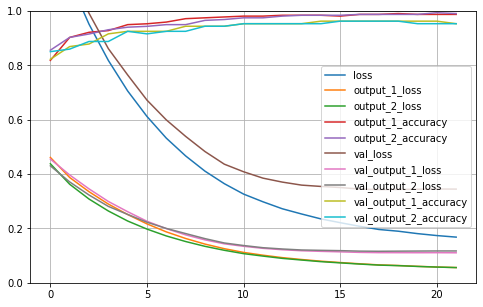

In [19]:

def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()
    
plot_learning_curves(history)

In [20]:
model.evaluate([x_test_scaled_wide, x_test_scaled_deep], y_test)

5/5 [==============================] - 0s 2ms/step - loss: 0.2223 - output_1_loss: 0.0675 - output_2_loss: 0.0774 - output_1_accuracy: 0.9790 - output_2_accuracy: 0.9720


[0.22231410443782806,
 0.06749054789543152,
 0.07741177827119827,
 0.9790209531784058,
 0.9720279574394226]